##Importing Package

In [ ]:
# Install Package untuk sMAPE
!pip install git+https://github.com/jeslago/epftoolbox.git

  Cloning https://github.com/jeslago/epftoolbox.git to /tmp/pip-req-build-h3jsx8rj
  Running command git clone --filter=blob:none --quiet https://github.com/jeslago/epftoolbox.git /tmp/pip-req-build-h3jsx8rj
  Resolved https://github.com/jeslago/epftoolbox.git to commit d9cf47e2f892529ff06aa229409e80b929b6e6c9
  Preparing metadata (setup.py) ... done
  Created wheel for epftoolbox: filename=epftoolbox-1.0-py3-none-any.whl size=58765 sha256=56d2a5de321ae1b2c44c6ebb0aa70bfc0f08890d545130984c3b73d9425a9764
  Stored in directory: /tmp/pip-ephem-wheel-cache-yd9h9b2r/wheels/ea/22/e8/f67a6d7c384fa2ce2486da15f278aca1b1a13ffc5088946bf5
Successfully built epftoolbox


In [ ]:
# import package yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from epftoolbox.evaluation import sMAPE
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.svm import SVR

# Import Data

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Skripsi Rapid Topik/Penulisan/Data Citra/Datfix.xlsx')

In [ ]:
data.head()

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH,POINT_X,POINT_Y
0,8.95,1402.089966,33.410599,169.268997,-6.98016,14.51550,18.948900,2.143180,0.000230,1.48887,...,0.566054,0.575013,0.546828,2.10582,5.95028,2.07514,17.269138,3052.020020,107.646946,-6.778262
1,1.66,1158.979981,25.931400,314.806000,-7.58731,26.73270,7.126710,1.584220,0.000803,1.56439,...,0.600354,0.539227,0.514205,2.19447,5.39226,2.15929,19.581701,2598.580078,107.648265,-6.847805
2,1.61,1334.140015,23.140100,99.407898,-7.96873,4.64355,24.806200,1.163470,0.001973,1.42254,...,0.542497,0.574257,0.854286,1.46717,4.46154,1.93614,20.113136,2774.060059,107.607743,-6.798965
3,2.83,1352.099976,21.738899,138.951996,-6.80342,4.65967,23.527300,1.081250,0.000226,1.01381,...,0.369622,0.672975,0.788571,1.72837,2.14734,1.46217,20.692719,2785.290039,107.602226,-6.796746
4,4.11,1436.900024,8.079260,95.669800,-6.46925,11.87540,21.483299,0.595171,0.001125,1.39344,...,0.545455,0.618382,0.681818,1.76078,6.22963,2.10250,18.400653,2834.620117,107.606235,-6.792261


In [ ]:
# Delete Coordinate Columns
data = data.drop(columns=['POINT_X','POINT_Y'])

In [ ]:
data.head()

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
0,8.95,1402.089966,33.410599,169.268997,-6.98016,14.51550,18.948900,2.143180,0.000230,1.48887,...,-0.449690,0.349624,0.566054,0.575013,0.546828,2.10582,5.95028,2.07514,17.269138,3052.020020
1,1.66,1158.979981,25.931400,314.806000,-7.58731,26.73270,7.126710,1.584220,0.000803,1.56439,...,-0.416275,0.366947,0.600354,0.539227,0.514205,2.19447,5.39226,2.15929,19.581701,2598.580078
2,1.61,1334.140015,23.140100,99.407898,-7.96873,4.64355,24.806200,1.163470,0.001973,1.42254,...,-0.443305,0.318833,0.542497,0.574257,0.854286,1.46717,4.46154,1.93614,20.113136,2774.060059
3,2.83,1352.099976,21.738899,138.951996,-6.80342,4.65967,23.527300,1.081250,0.000226,1.01381,...,-0.010518,0.187709,0.369622,0.672975,0.788571,1.72837,2.14734,1.46217,20.692719,2785.290039
4,4.11,1436.900024,8.079260,95.669800,-6.46925,11.87540,21.483299,0.595171,0.001125,1.39344,...,-0.497797,0.355359,0.545455,0.618382,0.681818,1.76078,6.22963,2.10250,18.400653,2834.620117


In [ ]:
data.shape

(146, 29)

#Data Cleaning

In [ ]:
# Missing Value Detection
data.isnull().sum()

C_org        0
Elevation    0
SLOPE        0
ASPECT       0
CTI          0
TPI          0
VDEPTH       0
TRI          0
LSFactor     0
LAI          0
NDVI         0
CARI         0
NDBI         0
BSI          0
CFaktor      0
SCRI         0
SMI          0
SBR          0
CI           0
NISI         0
NDTI         0
NBR          0
FOX          0
FRI          0
FRO          0
GOS          0
LAT          0
LST          0
CH           0
dtype: int64

In [ ]:
data.isna().sum()

C_org        0
Elevation    0
SLOPE        0
ASPECT       0
CTI          0
TPI          0
VDEPTH       0
TRI          0
LSFactor     0
LAI          0
NDVI         0
CARI         0
NDBI         0
BSI          0
CFaktor      0
SCRI         0
SMI          0
SBR          0
CI           0
NISI         0
NDTI         0
NBR          0
FOX          0
FRI          0
FRO          0
GOS          0
LAT          0
LST          0
CH           0
dtype: int64

In [ ]:
# Duplicated Data Detection
data.duplicated().sum()

0

In [ ]:
# Outlier Detection
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
0,2.117585,0.683498,0.448805,0.099854,0.674415,1.646163,0.616123,0.451955,0.819694,0.200779,...,0.559174,0.555224,0.347706,0.189686,0.754755,0.727764,0.720961,0.506871,1.009027,1.017068
1,0.935186,0.105453,0.059907,1.875998,1.107881,3.165519,0.695803,0.005366,0.523493,0.362101,...,0.448053,0.713381,0.509609,0.353191,0.918920,1.073213,0.455498,0.717847,0.145255,0.537357
2,0.956124,0.462983,0.085233,1.048309,1.380191,0.418467,0.576645,0.330799,0.080685,0.059087,...,0.537941,0.274104,0.236512,0.193140,0.792428,1.760907,0.012733,0.158378,0.053243,0.064201
3,0.445235,0.521268,0.158092,0.511447,0.548234,0.420472,0.585265,0.396490,0.821966,0.814023,...,0.901287,0.923047,0.579493,0.257897,0.461739,0.743071,1.088186,1.029932,0.269725,0.102698
4,0.090779,0.796465,0.868357,1.099058,0.309658,1.317835,0.599041,0.784850,0.357289,0.003075,...,0.719154,0.607584,0.250474,0.008464,0.075461,0.616777,0.853855,0.575466,0.586391,0.271805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,0.667179,0.201934,0.161895,2.108981,0.699417,2.285766,0.189580,0.378371,0.184320,0.091212,...,0.422227,0.785088,0.286065,0.074993,0.957919,1.337687,0.714763,0.817355,0.627579,0.246403
142,0.249909,0.081179,1.203776,0.766885,0.618607,0.426604,0.461926,0.945229,0.523957,0.651187,...,1.002206,0.930828,0.630927,0.418307,0.819821,0.716736,1.831980,1.027504,0.113723,0.217230
143,0.078217,0.096659,1.117548,0.778696,0.771303,0.285195,0.435809,1.079415,0.375182,0.931322,...,0.688370,0.849152,0.779293,0.706439,0.773611,0.502415,0.497605,0.908390,0.244961,0.235981
144,0.152102,0.110289,1.048527,0.795137,0.698103,0.783739,0.255231,1.221159,0.152786,0.628757,...,0.719090,0.721050,0.607850,0.506995,0.798646,0.674107,0.673156,0.728377,0.024253,0.505771


In [ ]:
# Indicated Outliers
threshold = 3
print('z score lebih dari 3')
print(np.where(z > 3))
print('z score kurang dari 3')
print(np.where(z < -3))

z score lebih dari 3
(array([  1,   5,  10,  15,  49,  52,  52,  54,  64,  84,  84,  99, 102,
       108, 116, 126]), array([ 5,  8,  5, 22,  7,  2,  7,  5,  4,  4,  8,  5, 22,  4, 23,  4]))
z score kurang dari 3
(array([], dtype=int64), array([], dtype=int64))


In [ ]:
#Outlier Deletion
data_clean= data[(z < 3).all(axis=1)]

In [ ]:
data.shape

(146, 29)

In [ ]:
data_clean.shape

(132, 29)

outlier terdeteksi = 14

In [ ]:
#Double-Check on Excel
z.to_excel("z score.xlsx")

In [ ]:
data_clean

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
0,8.95,1402.089966,33.410599,169.268997,-6.98016,14.515500,18.948900,2.143180,0.000230,1.48887,...,-0.449690,0.349624,0.566054,0.575013,0.546828,2.10582,5.95028,2.07514,17.269138,3052.020020
2,1.61,1334.140015,23.140100,99.407898,-7.96873,4.643550,24.806200,1.163470,0.001973,1.42254,...,-0.443305,0.318833,0.542497,0.574257,0.854286,1.46717,4.46154,1.93614,20.113136,2774.060059
3,2.83,1352.099976,21.738899,138.951996,-6.80342,4.659670,23.527300,1.081250,0.000226,1.01381,...,-0.010518,0.187709,0.369622,0.672975,0.788571,1.72837,2.14734,1.46217,20.692719,2785.290039
4,4.11,1436.900024,8.079260,95.669800,-6.46925,11.875400,21.483299,0.595171,0.001125,1.39344,...,-0.497797,0.355359,0.545455,0.618382,0.681818,1.76078,6.22963,2.10250,18.400653,2834.620117
6,5.35,1254.520020,15.223300,300.082001,-7.50642,5.109990,9.753170,1.469140,0.001525,1.67749,...,-0.490722,0.317869,0.586918,0.502905,0.582038,1.97841,5.39466,1.93199,19.929524,2953.530029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2.30,1129.250000,27.892799,331.967011,-7.01518,-17.101299,82.235001,2.051080,0.001460,1.35218,...,-0.408509,0.374801,0.552995,0.632943,0.506455,2.26234,5.93725,2.19898,18.290383,2827.209961
142,4.49,1166.459961,47.930000,120.137001,-6.90199,4.708980,41.827099,2.760570,0.000803,1.69972,...,-0.582913,0.390764,0.626056,0.524975,0.533898,2.10299,8.28571,2.28280,19.666120,2818.699951
143,4.08,1161.689941,46.271702,119.266998,-7.11587,3.571900,45.702000,2.928520,0.002543,1.83086,...,-0.488540,0.381818,0.657488,0.461912,0.543081,2.04799,5.48077,2.23529,19.314759,2824.169922
144,3.53,1157.489990,44.944302,118.056000,-7.01334,-5.023440,72.494400,3.105930,0.002113,1.68922,...,-0.497778,0.367787,0.621167,0.505564,0.538106,2.09205,5.84979,2.16349,20.035522,2902.870117


In [ ]:
data_clean.to_excel('data clean.xlsx')

#Exploratory Data Analysis (EDA)

In [ ]:
# Data Grouping based on SCORPAN Model
soil = data_clean[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','C_org']]
climate = data_clean[['CH','LST','C_org']]
organism = data_clean[['LAI','CARI','NDBI','NDVI','BSI','CFaktor','C_org']]
relief = data_clean[['Elevation','SLOPE','ASPECT','VDEPTH','LSFactor',
                     'TPI','TRI','CTI','C_org']]
parent = data_clean[['FOX','FRI','FRO','GOS','LAT','C_org']]

## Descriptive Statistics

In [ ]:
data_clean.describe()

,C_org,Elevation,SLOPE,ASPECT,CTI,TPI,VDEPTH,TRI,LSFactor,LAI,...,NISI,NDTI,NBR,FOX,FRI,FRO,GOS,LAT,LST,CH
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,3.822576,1197.944794,24.749857,178.148560,-6.189470,1.083279,106.665137,1.566118,1.614575e-03,1.403253,...,-0.283442,0.289843,0.497227,0.609193,0.691578,1.916870,4.428564,1.876002,19.936830,2761.176888
std,2.306854,306.527363,18.006035,69.959386,0.821375,6.887549,146.652508,1.142340,1.173989e-03,0.469319,...,0.299914,0.108264,0.205701,0.208932,0.190010,0.255262,2.103579,0.398888,2.638829,293.787040
min,0.790000,660.674011,1.600910,25.583401,-8.067020,-22.445200,0.800049,0.111994,-8.000000e-07,0.507346,...,-0.628568,0.002165,-0.098591,0.194318,0.446154,1.315020,0.301056,1.004340,15.386964,2173.969971
25%,1.797500,1002.375259,9.331410,135.592754,-6.697610,-1.427140,24.486475,0.592623,8.112750e-04,1.008485,...,-0.518352,0.220877,0.419305,0.480873,0.529608,1.696923,2.454095,1.566990,17.484198,2394.137390
50%,3.250000,1251.880005,20.553900,176.557999,-6.293100,1.122620,48.339151,1.339190,1.452050e-03,1.430740,...,-0.426149,0.320657,0.570178,0.541724,0.633363,1.920435,4.582620,1.944045,19.982523,2831.250000
75%,5.395000,1410.619964,37.097225,216.195256,-5.865255,4.402770,78.656748,2.266158,2.123350e-03,1.758140,...,-0.023254,0.380358,0.645610,0.667790,0.832407,2.134290,6.076845,2.227670,21.897180,3003.987488
max,10.560000,1682.229981,78.695702,357.368012,-2.794090,19.686600,458.186005,5.241060,5.539700e-03,2.336500,...,0.351227,0.428571,0.758242,1.245600,1.112970,2.467200,9.000000,2.500000,26.156655,3203.340088


## Normality Test

In [ ]:
#checking with smirnof-kolmogorov
features=['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','CH','LST','LAI','CARI',
          'NDBI','NDVI','BSI','CFaktor','Elevation','SLOPE','ASPECT','VDEPTH',
          'LSFactor','TPI','TRI','CTI','FOX','FRI','FRO','GOS','LAT','C_org']
for a in features:
  z_score = stats.zscore(data_clean[a])
  normality = stats.kstest(z_score, 'norm',)
  print('normality for ', a, '=', normality)

normality for  SBR = KstestResult(statistic=0.05474613953423069, pvalue=0.8031086395543477, statistic_location=0.9149751219721562, statistic_sign=-1)
normality for  CI = KstestResult(statistic=0.07093858569912304, pvalue=0.497598208814803, statistic_location=0.4593238594804438, statistic_sign=-1)
normality for  SMI = KstestResult(statistic=0.130478974897201, pvalue=0.020276587026742357, statistic_location=-0.5869699804028856, statistic_sign=1)
normality for  NISI = KstestResult(statistic=0.19479680364261864, pvalue=7.301539860622656e-05, statistic_location=-0.46670713676093906, statistic_sign=1)
normality for  SCRI = KstestResult(statistic=0.1356014379846029, pvalue=0.014068175413262544, statistic_location=0.4919757057679561, statistic_sign=-1)
normality for  NDTI = KstestResult(statistic=0.15482363982088843, pvalue=0.0031439327134927275, statistic_location=0.5471260824382171, statistic_sign=-1)
normality for  NBR = KstestResult(statistic=0.16317822113615238, pvalue=0.00153964830805590

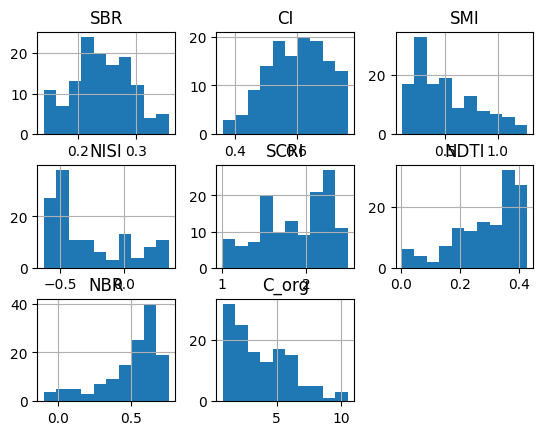

In [ ]:
soil.hist()
plt.show()

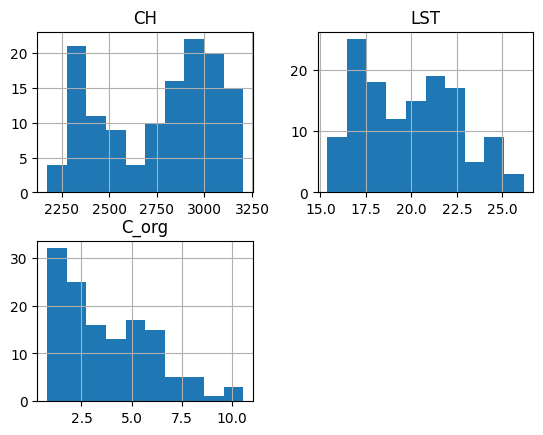

In [ ]:
climate.hist()
plt.show()

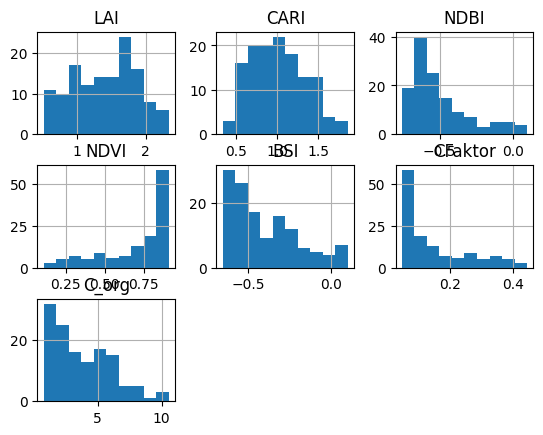

In [ ]:
organism.hist()
plt.show()

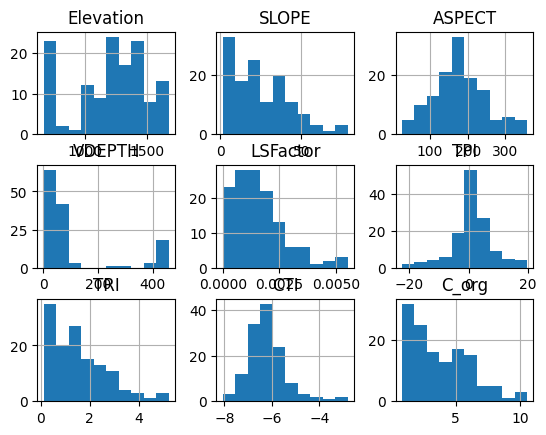

In [ ]:
relief.hist()
plt.show()

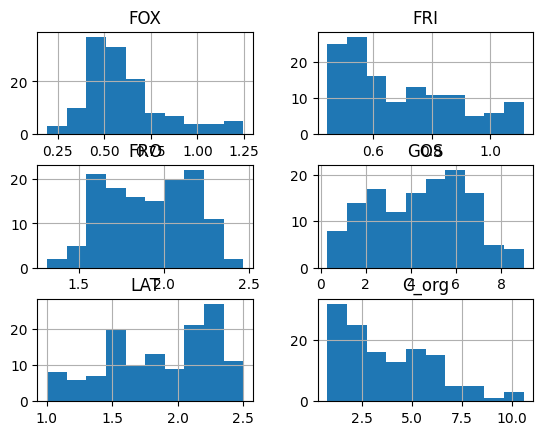

In [ ]:
parent.hist()
plt.show()

#Feature Selection

In [ ]:
soil_corr = soil.corr()
soil_corr.to_excel("S Corr.xlsx")

In [ ]:
climate_corr = climate.corr()
climate_corr.to_excel("C Corr.xlsx")

In [ ]:
organism_corr = organism.corr()
organism_corr.to_excel("O Corr.xlsx")

In [ ]:
relief_corr = relief.corr()
relief_corr.to_excel("R Corr.xlsx")

In [ ]:
parent_corr = parent.corr()
parent_corr.to_excel("P Corr.xlsx")

## Correlation based Feature Selection (CFS)

### Correlation on Soil

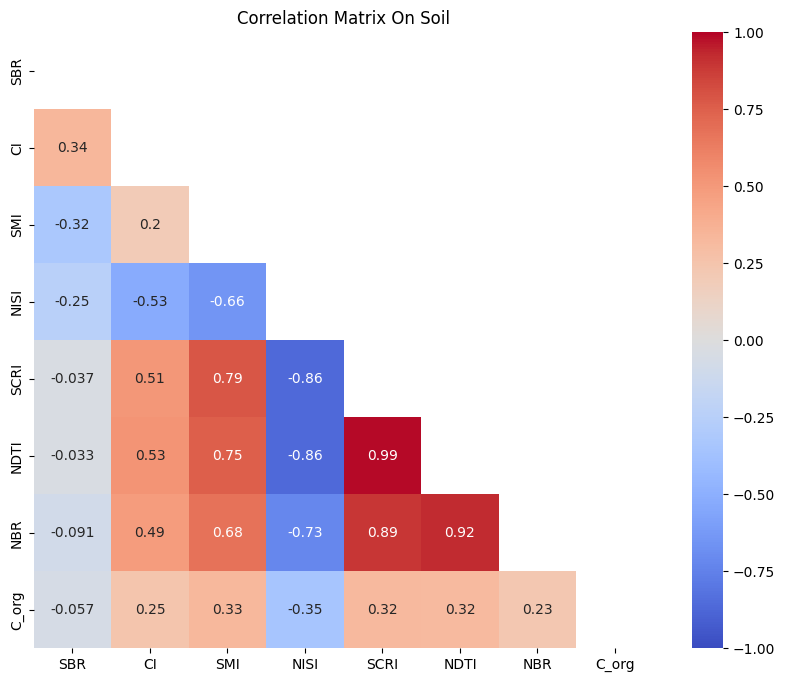

In [ ]:
#Correlation Matrix on Soil
mask = np.triu(np.ones_like(soil.corr()))
plt.figure(figsize=(10, 8))
sns.heatmap(soil.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1,
            mask = mask)
plt.title('Correlation Matrix On Soil')
plt.show()

Soil Ranking:

1 NISI (-0.35)

2 SMI (0.33)

3 SCRI/NDTI (0.32)

4 CI (0.25)

5 NBR (0.23)

6 SBR (-0.057)

### Correlation on Climate

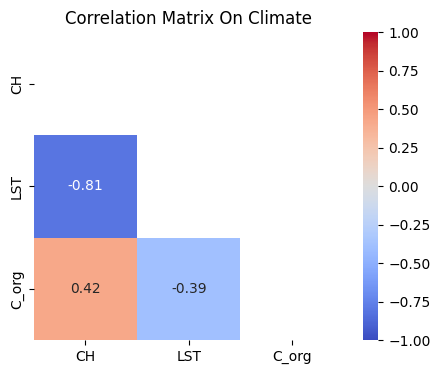

In [ ]:
#Correlation Matrix on Climate
plt.figure(figsize=(5, 4))
mask = np.triu(np.ones_like(climate.corr()))
sns.heatmap(climate.corr(), annot=True, cmap='coolwarm',  vmin = -1, vmax = 1,
            mask = mask)
plt.title('Correlation Matrix On Climate')
plt.show()

Climate Ranking:

1 CH 0.42

2 LST -0.39

### Correlation on Organism

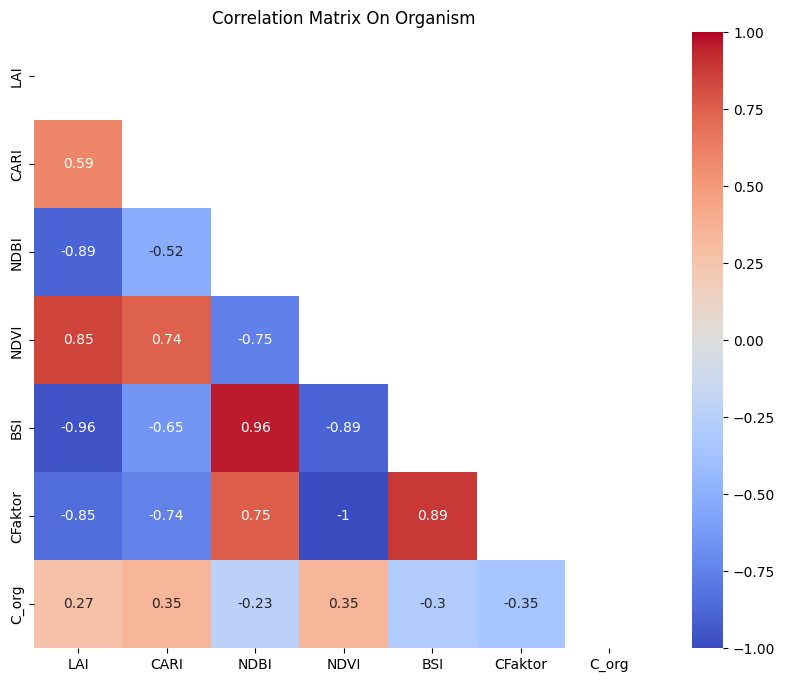

In [ ]:
#Correlation Matrix on Organism
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(organism.corr()))
sns.heatmap(organism.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1,
            mask = mask)
plt.title('Correlation Matrix On Organism')
plt.show()

Organisme Ranking:

1 CARI (0.35)

1 NDVI (0.35)

1 CFaktor (-0.35)

4 BSI (-0.30)

5 LAI (0.27)

6 NDBI (-0.23)

### Correlation on relief

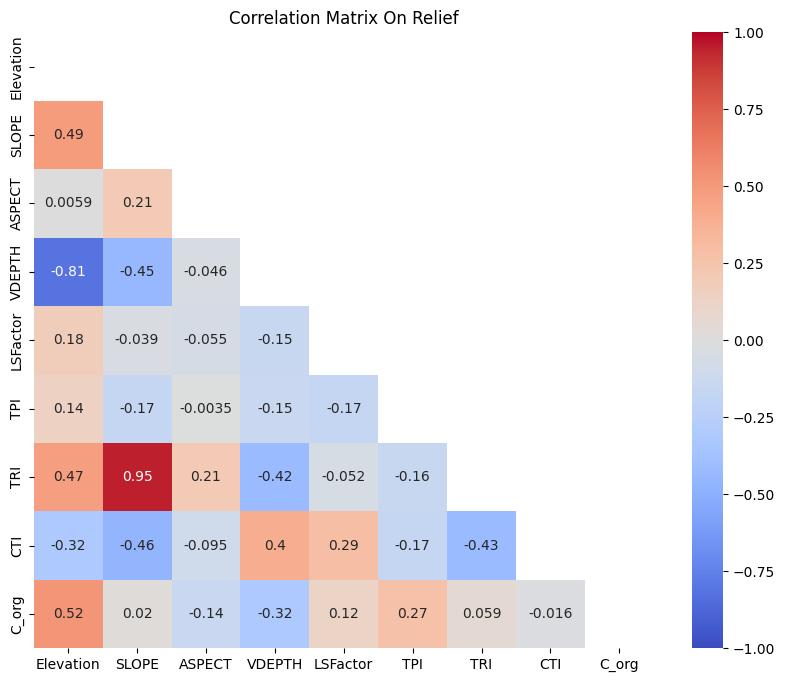

In [ ]:
#Correlation Matrix on Relief
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(relief.corr()))
sns.heatmap(relief.corr(), annot=True, cmap='coolwarm', vmin = -1, vmax = 1,
            mask = mask)
plt.title('Correlation Matrix On Relief')
plt.show()

Relief Ranking:

1 Elevation (0.52)

2 VDEPTH (-0.32)

3 TPI (0.27)

4 Aspect (-0.14)

5 LSFactor (0.12)

6 TRI (0.059)

7 Slope (0.020)

8 CTI (-0.016)

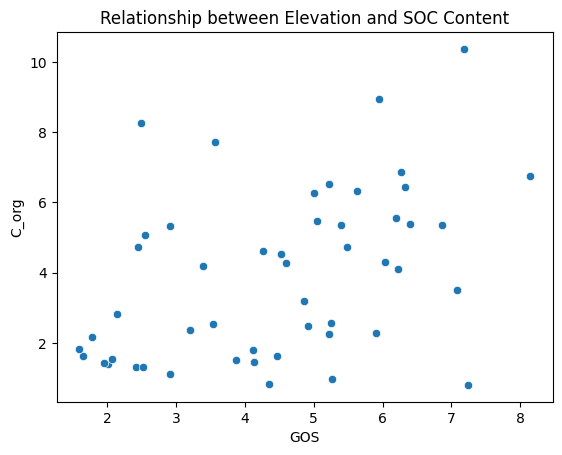

In [ ]:
sns.scatterplot(x=parent.GOS.iloc[0:50], y =parent.C_org.iloc[0:50], data = parent)
plt.title('Relationship between Elevation and SOC Content')
plt.show()

### Correlation on Parent Material

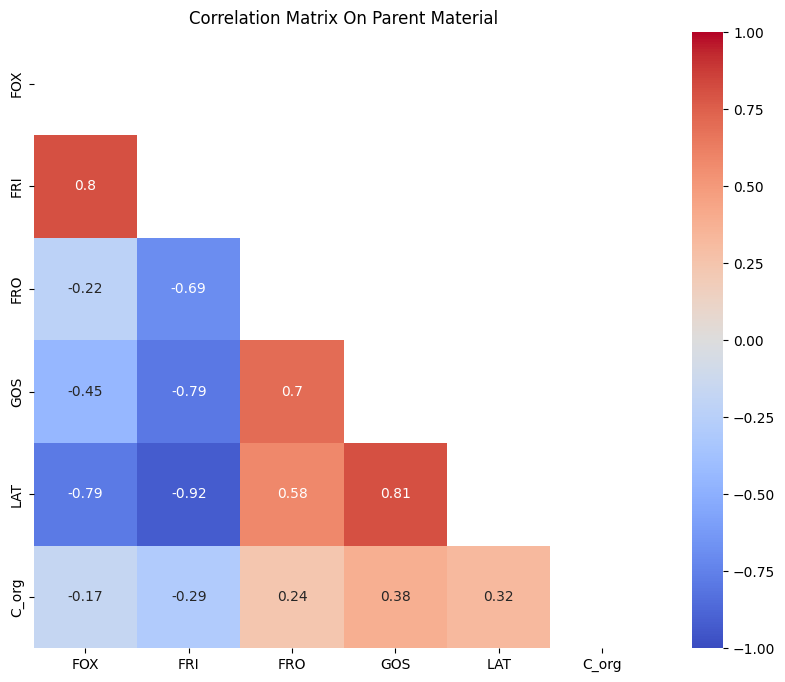

In [ ]:
#Correlation Matrix on Parent Material
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(parent.corr()))
sns.heatmap(parent.corr(), annot=True, cmap='coolwarm', vmax = 1, vmin= -1,
            mask = mask)
plt.title('Correlation Matrix On Parent Material')
plt.show()

Parent Material Ranking:

1 GOS (0.38)

2 LAT (0.32)

3 FRI (-0.29)

4 FRO (0.24)

5 FOX (-0.17)

## Mutual Information

### Soil Mutual  Info

In [ ]:
soil.head()

,SBR,CI,SMI,NISI,SCRI,NDTI,NBR,C_org
0,0.193955,0.540293,1.088450,-0.449690,2.07514,0.349624,0.566054,8.95
2,0.242976,0.371482,0.958571,-0.443305,1.93614,0.318833,0.542497,1.61
3,0.300105,0.575680,0.225786,-0.010518,1.46217,0.187709,0.369622,2.83
4,0.146951,0.466667,1.277305,-0.497797,2.10250,0.355359,0.545455,4.11
6,0.345694,0.681818,0.463287,-0.490722,1.93199,0.317869,0.586918,5.35


In [ ]:
soil= soil[['SBR','CI','SMI','NISI','SCRI','NDTI','NBR','C_org']]

In [ ]:
x = soil.iloc[:,0:7]
y = soil.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['SBR']


In [ ]:
#MI Scores on all Soil Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7eac8a9cb9a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns

In [ ]:
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score':
                             mi_scores})

In [ ]:
mi_scores_df.to_excel('soil MI.xlsx')

In [ ]:
print(mi_scores_df)

  Feature  Mutual Information Score
0     SBR                  0.093245
1      CI                  0.039072
2     SMI                  0.035731
3    NISI                  0.085882
4    SCRI                  0.000000
5    NDTI                  0.009369
6     NBR                  0.079709


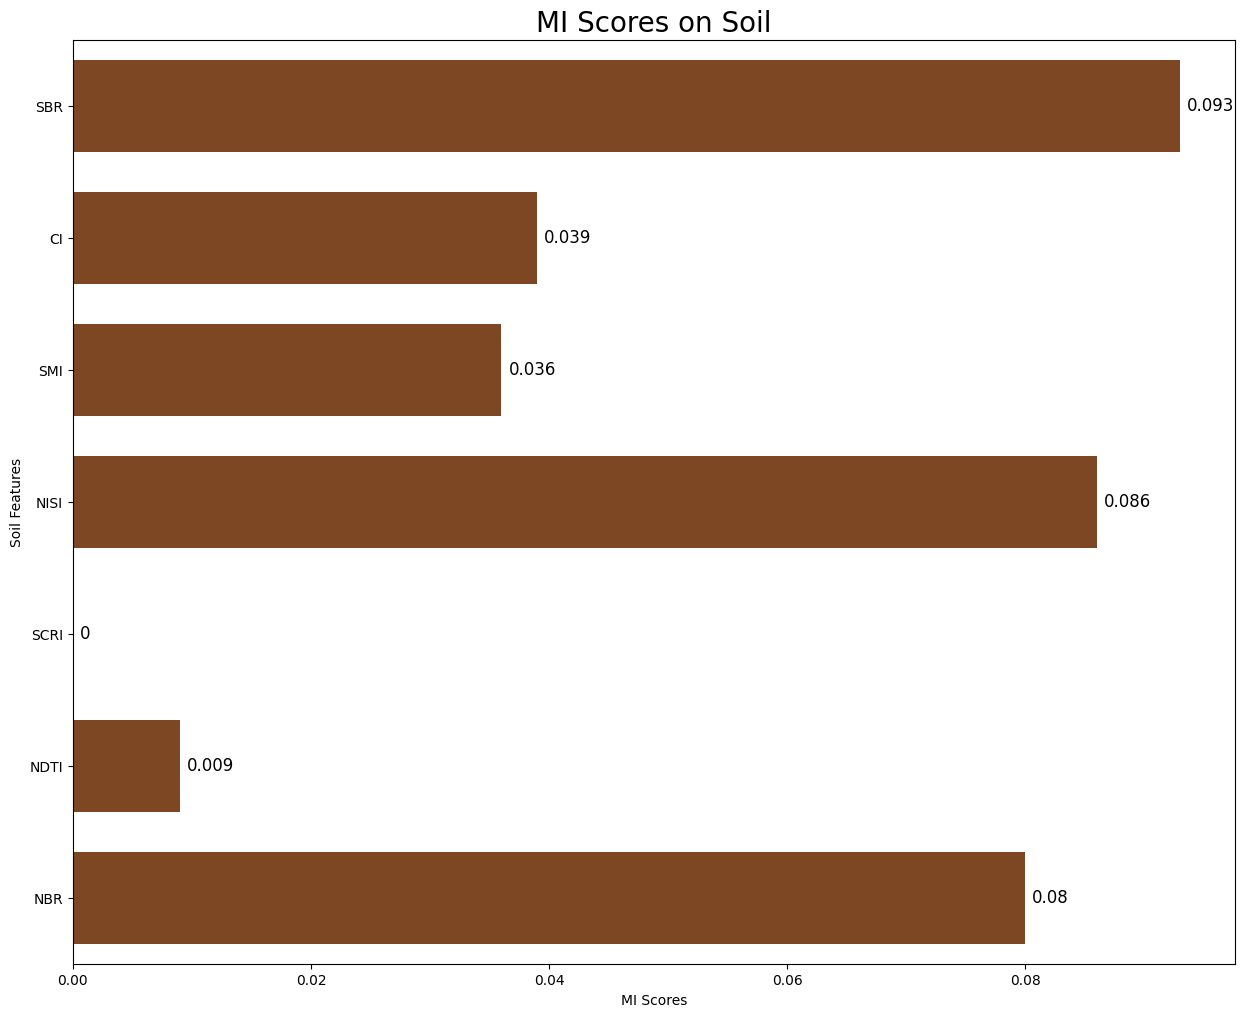

In [ ]:
#Plotting Mi Scores
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize = (15,12))
plot = sns.barplot(x=x, y=y, orient='h', color= 'saddlebrown', width = 0.7)
plot.bar_label(plot.containers[0], fontsize = 12, padding = 5)
plt.xlabel('MI Scores')
plt.ylabel('Soil Features')
plt.title(label = 'MI Scores on Soil', fontsize = 20)
plt.show()

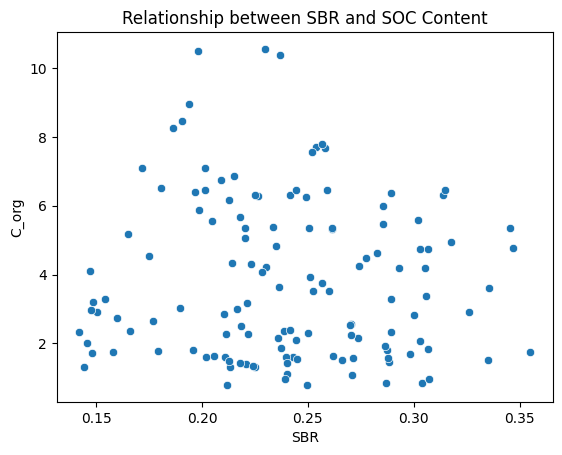

In [ ]:
sns.scatterplot(x='SBR', y ='C_org', data = soil)
plt.title('Relationship between SBR and SOC Content')
plt.show()

### Climate Mutual Info

In [ ]:
climate.head()

,CH,LST,C_org
0,3052.020020,17.269138,8.95
2,2774.060059,20.113136,1.61
3,2785.290039,20.692719,2.83
4,2834.620117,18.400653,4.11
6,2953.530029,19.929524,5.35


In [ ]:
x = climate.iloc[:,0:2]
y = climate.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['CH']


In [ ]:
#MI Scores on all Climate Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7eac8a9cb9a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns

In [ ]:
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score'
: mi_scores})

In [ ]:
print(mi_scores_df)

  Feature  Mutual Information Score
0      CH                  0.313072
1     LST                  0.099815


In [ ]:
mi_scores_df.to_excel('Climate MI.xlsx')

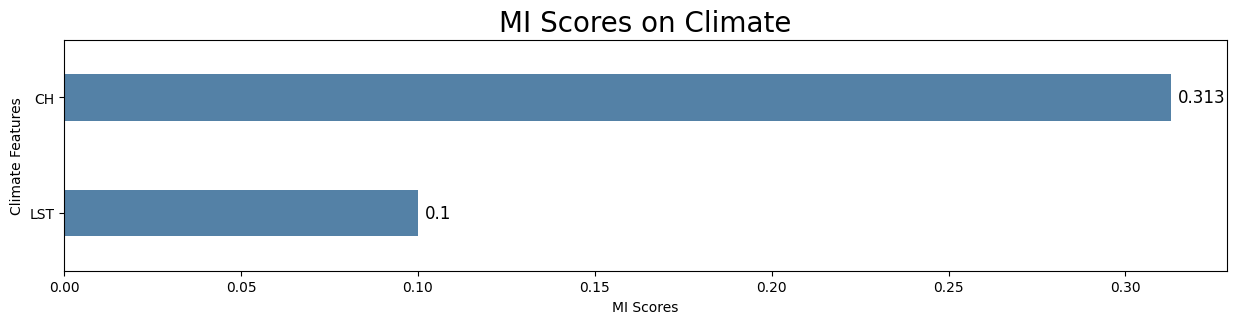

In [ ]:
#Plotting Mi Scores
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize = (15,3))
plot = sns.barplot(x=x, y=y, orient='h', color ='steelblue', width = 0.4)
plot.bar_label(plot.containers[0], fontsize = 12, padding = 5)
plt.xlabel('MI Scores')
plt.ylabel('Climate Features')
plt.title(label = 'MI Scores on Climate', fontsize = 20)
plt.show()

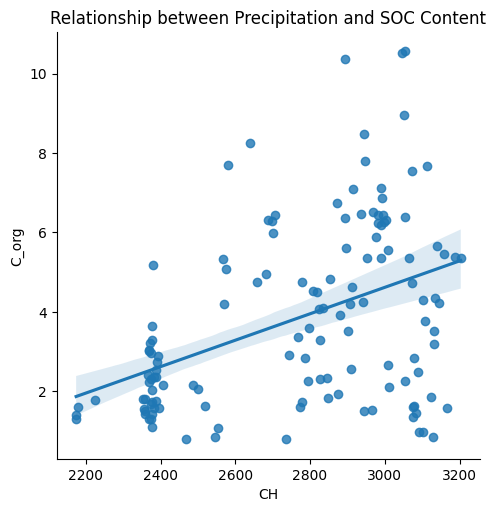

In [ ]:
sns.lmplot(x='CH', y ='C_org', data = climate)
plt.title('Relationship between Precipitation and SOC Content')
plt.show()

### Organism Mutual Info

In [ ]:
organism.head()

,LAI,CARI,NDBI,NDVI,BSI,CFaktor,C_org
0,1.48887,1.073588,-0.566054,0.856604,-0.494949,0.071698,8.95
2,1.42254,0.622803,-0.542497,0.834598,-0.444632,0.082701,1.61
3,1.01381,0.571552,-0.369622,0.504808,-0.242261,0.247596,2.83
4,1.39344,1.090671,-0.545455,0.857734,-0.469772,0.071133,4.11
6,1.67749,1.572049,-0.586918,0.849305,-0.509593,0.075347,5.35


In [ ]:
x = organism.iloc[:,0:6]
y = organism.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['CFaktor']


In [ ]:
#MI Scores on all Organism Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7eac8a9cb9a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns

In [ ]:
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score'
: mi_scores})

In [ ]:
print(mi_scores_df)

   Feature  Mutual Information Score
0      LAI                  0.120652
1     CARI                  0.086357
2     NDBI                  0.078408
3     NDVI                  0.156039
4      BSI                  0.089154
5  CFaktor                  0.156039


In [ ]:
mi_scores_df.to_excel('Organism MI.xlsx')

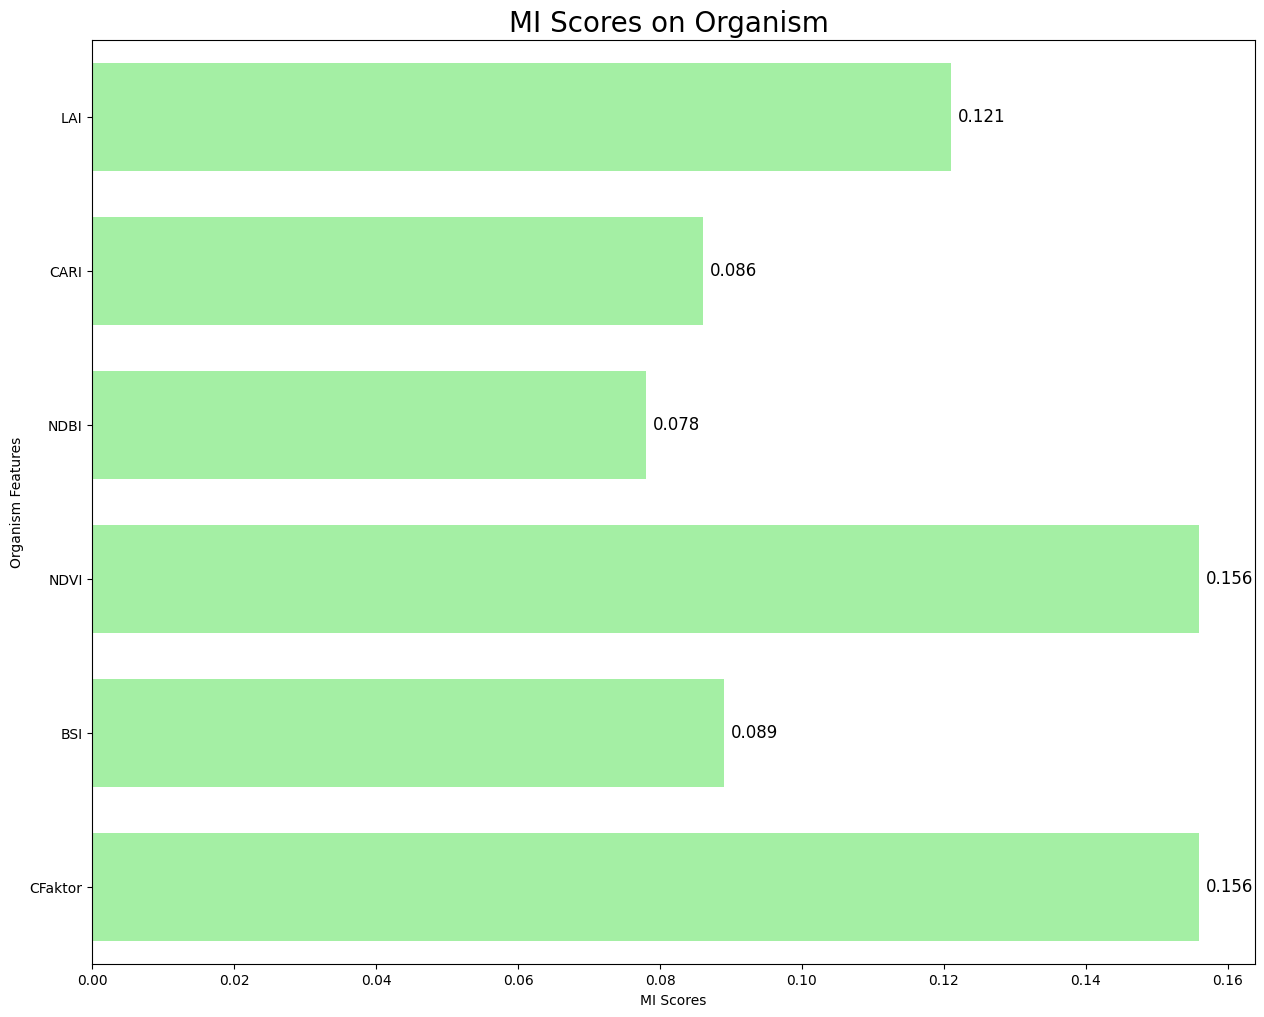

In [ ]:
#Plotting Mi Scores
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize = (15,12))
plot = sns.barplot(x=x, y=y, orient='h', color = 'palegreen', width = 0.7)
plot.bar_label(plot.containers[0], fontsize = 12, padding = 5)
plt.xlabel('MI Scores')
plt.ylabel('Organism Features')
plt.title(label = 'MI Scores on Organism ', fontsize = 20)
plt.show()

### Relief Mutual Info

In [ ]:
relief.head()

,Elevation,SLOPE,ASPECT,VDEPTH,LSFactor,TPI,TRI,CTI,C_org
0,1402.089966,33.410599,169.268997,18.948900,0.000230,14.51550,2.143180,-6.98016,8.95
2,1334.140015,23.140100,99.407898,24.806200,0.001973,4.64355,1.163470,-7.96873,1.61
3,1352.099976,21.738899,138.951996,23.527300,0.000226,4.65967,1.081250,-6.80342,2.83
4,1436.900024,8.079260,95.669800,21.483299,0.001125,11.87540,0.595171,-6.46925,4.11
6,1254.520020,15.223300,300.082001,9.753170,0.001525,5.10999,1.469140,-7.50642,5.35


In [ ]:
x = relief.iloc[:,0:8]
y = relief.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['Elevation']


In [ ]:
#MI Scores on all Relief Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7eac8a9cb9a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns

In [ ]:
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score'
: mi_scores})

In [ ]:
print(mi_scores_df)

     Feature  Mutual Information Score
0  Elevation                  0.242897
1      SLOPE                  0.014071
2     ASPECT                  0.027688
3     VDEPTH                  0.180001
4   LSFactor                  0.000000
5        TPI                  0.000000
6        TRI                  0.149392
7        CTI                  0.000000


In [ ]:
mi_scores_df.to_excel('Relief MI.xlsx')

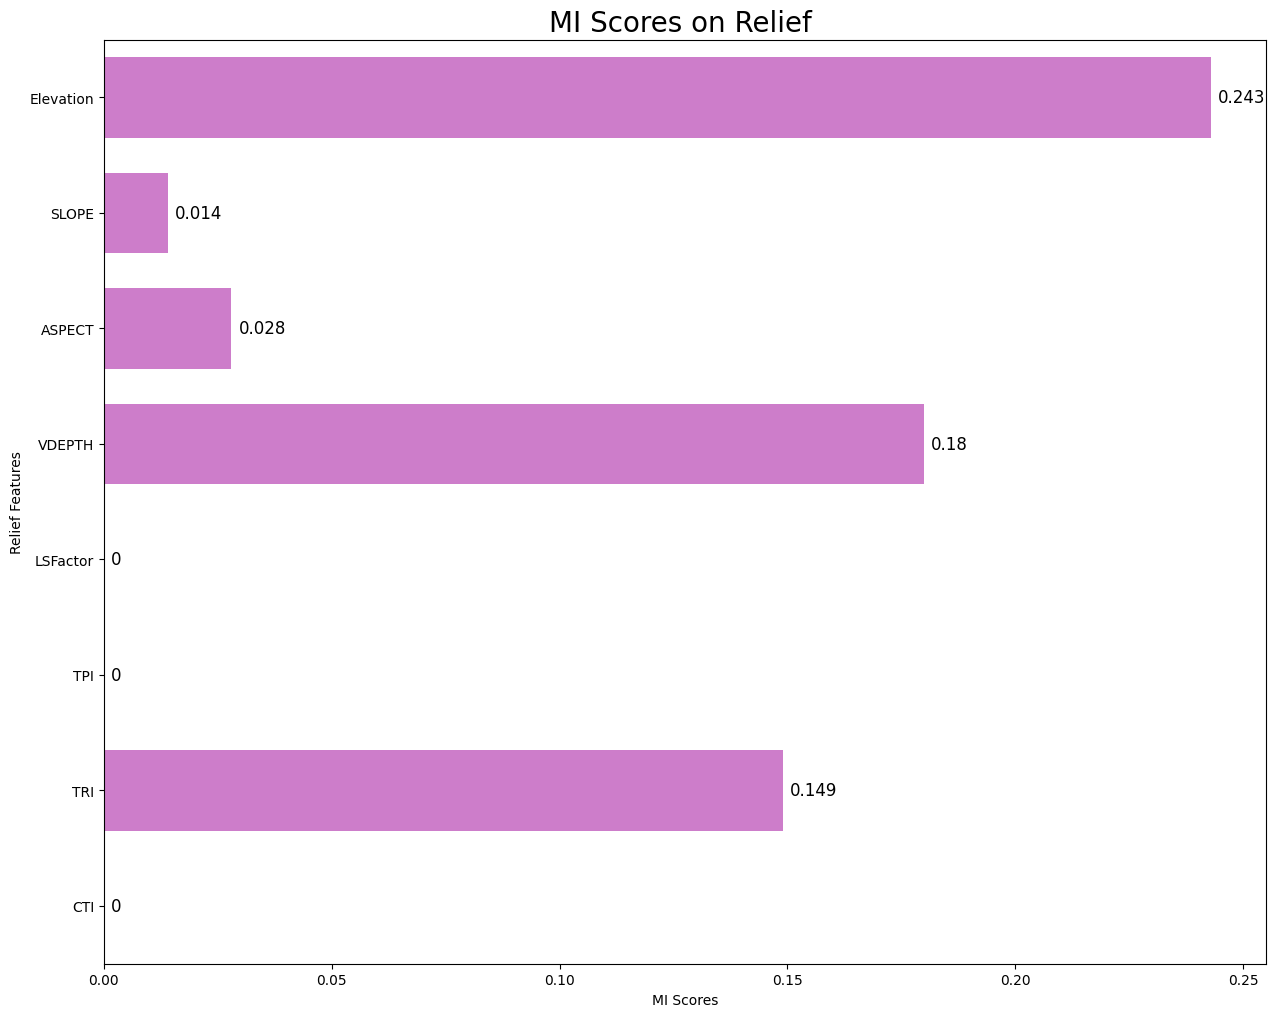

In [ ]:
#Plotting Mi Scores
x = mi_scores_df['Mutual Information Score'].round(3)
y = mi_scores_df['Feature']

plt.figure(figsize = (15,12))
plot = sns.barplot(x=x, y=y, orient='h', color ='orchid',
               width = 0.7)
plot.bar_label(plot.containers[0], fontsize = 12, padding = 5)
plt.xlabel('MI Scores')
plt.ylabel('Relief Features')
plt.title(label = 'MI Scores on Relief ', fontsize = 20)
plt.show()

### Parent Material Mutual Info

In [ ]:
parent.head()

,FOX,FRI,FRO,GOS,LAT,C_org
0,0.575013,0.546828,2.10582,5.95028,2.07514,8.95
2,0.574257,0.854286,1.46717,4.46154,1.93614,1.61
3,0.672975,0.788571,1.72837,2.14734,1.46217,2.83
4,0.618382,0.681818,1.76078,6.22963,2.10250,4.11
6,0.502905,0.582038,1.97841,5.39466,1.93199,5.35


In [ ]:
x = parent.iloc[:,0:5]
y = parent.iloc[:,-1]

In [ ]:
selector = SelectKBest(score_func=mutual_info_regression, k=1) # k = 1 variable
x_selected = selector.fit_transform(x, y)

In [ ]:
selected_indices = selector.get_support(indices=True)

In [ ]:
selected_features = [x.columns[i] for i in selected_indices]
print("Variabel Terpilih:", selected_features)

Variabel Terpilih: ['FOX']


In [ ]:
#MI Scores on all Parent Material Variable
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(x, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7eac8a9cb9a0>)

In [ ]:
mi_scores = selector.scores_
feature_names = x.columns

In [ ]:
mi_scores_df = pd.DataFrame({'Feature': feature_names, 'Mutual Information Score'
: mi_scores})

In [ ]:
print(mi_scores_df)

  Feature  Mutual Information Score
0     FOX                  0.159387
1     FRI                  0.000000
2     FRO                  0.008123
3     GOS                  0.085172
4     LAT                  0.000000


## Recursive Features Elimination with Random Forest Regression

### Soil RFE w/ RF

In [ ]:
x = soil.iloc[:,0:7]
y = soil.iloc[:,-1]

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=1)

In [ ]:
selected_features = x.columns[rfe.support_]

In [ ]:
print('Variabel Terpilih: ',selected_features)

Variabel Terpilih:  Index(['NISI'], dtype='object')


In [ ]:
# R2 Score to measure all soil features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'SBR': 0.8236
R-squared score for 'CI': 0.8007
R-squared score for 'SMI': 0.8303
R-squared score for 'NISI': 0.8544
R-squared score for 'SCRI': 0.8057
R-squared score for 'NDTI': 0.8076
R-squared score for 'NBR': 0.8221


### Climate RFE w/ RF

In [ ]:
x = climate[['LST','CH']]
y = climate [['C_org']]
y = np.ravel(y)

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=1)

In [ ]:
selected_features = x.columns[rfe.support_]

In [ ]:
print('Variabel Terpilih: ',selected_features)

Variabel Terpilih:  Index(['CH'], dtype='object')


In [ ]:
# R2 Score to measure all climate features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'LST': 0.8300
R-squared score for 'CH': 0.8887


### Organism RFE w/ RF

In [ ]:
x = organism.iloc[:,0:6]
y = organism.iloc[:,-1]

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=1)

In [ ]:
selected_features = x.columns[rfe.support_]

In [ ]:
print('Variabel Terpilih: ',selected_features)

Variabel Terpilih:  Index(['NDVI'], dtype='object')


In [ ]:
# R2 Score to measure all organism features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'LAI': 0.8131
R-squared score for 'CARI': 0.7991
R-squared score for 'NDBI': 0.8229
R-squared score for 'NDVI': 0.8264
R-squared score for 'BSI': 0.8120
R-squared score for 'CFaktor': 0.8331


### Relief RFE w/ RF

In [ ]:
x = relief.iloc[:,0:8]
y = relief.iloc [:,-1]

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=1)

In [ ]:
selected_features = x.columns[rfe.support_]

In [ ]:
print('Variabel Terpilih: ',selected_features)

Variabel Terpilih:  Index(['Elevation'], dtype='object')


In [ ]:
# R2 Score to measure all relief features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'Elevation': 0.8440
R-squared score for 'SLOPE': 0.7955
R-squared score for 'ASPECT': 0.8560
R-squared score for 'VDEPTH': 0.8358
R-squared score for 'LSFactor': 0.7917
R-squared score for 'TPI': 0.8118
R-squared score for 'TRI': 0.8126
R-squared score for 'CTI': 0.8229


### Parent Material RFE w/ RR

In [ ]:
x = parent.iloc[:,0:5]
y = parent.iloc [:,-1]

In [ ]:
rfe = RFE(estimator=rf, n_features_to_select=1)

In [ ]:
rfe.fit(x, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=1)

In [ ]:
selected_features = x.columns[rfe.support_]

In [ ]:
print('Variabel Terpilih: ',selected_features)

Variabel Terpilih:  Index(['GOS'], dtype='object')


In [ ]:
# R2 Score to measure all parent material features tested on rfe
for feature in x.columns:
    rf.fit(x[[feature]], y)
    y_pred = rf.predict(x[[feature]])
    r_squared = r2_score(y, y_pred)
    print(f"R-squared score for '{feature}': {r_squared:.4f}")

R-squared score for 'FOX': 0.8232
R-squared score for 'FRI': 0.8395
R-squared score for 'FRO': 0.7919
R-squared score for 'GOS': 0.8434
R-squared score for 'LAT': 0.8172


##Hasil Feature Selection with 3 method

In [ ]:
#Dataset Corr Matrix
corr_mat = data_clean[['NISI','CH','CFaktor','Elevation','GOS','C_org']]
corr_mat

,NISI,CH,CFaktor,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.071698,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.082701,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.247596,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.071133,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.075347,1254.520020,5.39466,5.35
...,...,...,...,...,...,...
141,-0.408509,2827.209961,0.087343,1129.250000,5.93725,2.30
142,-0.582913,2818.699951,0.060103,1166.459961,8.28571,4.49
143,-0.488540,2824.169922,0.081159,1161.689941,5.48077,4.08
144,-0.497778,2902.870117,0.070830,1157.489990,5.84979,3.53


In [ ]:
#Dataset Mutual Information
mut_info = data_clean[['SBR','CH','CFaktor','Elevation','FOX','C_org']]
mut_info.head()

,SBR,CH,CFaktor,Elevation,FOX,C_org
0,0.193955,3052.020020,0.071698,1402.089966,0.575013,8.95
2,0.242976,2774.060059,0.082701,1334.140015,0.574257,1.61
3,0.300105,2785.290039,0.247596,1352.099976,0.672975,2.83
4,0.146951,2834.620117,0.071133,1436.900024,0.618382,4.11
6,0.345694,2953.530029,0.075347,1254.520020,0.502905,5.35


In [ ]:
#Dataset Recursive Feature Elimination on Random Forest Regression
rfe = data_clean[['NISI', 'CH', 'NDVI', 'Elevation', 'GOS','C_org']]
rfe.head()

,NISI,CH,NDVI,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.856604,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.834598,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.504808,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.857734,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.849305,1254.520020,5.39466,5.35


#Uji Model

##Random Forest

### RF Corr Mat

In [ ]:
#Corr Matt dataset
x = corr_mat.iloc[:,0:5].values
y = corr_mat.iloc[:,-1].values

In [ ]:
rf= RandomForestRegressor()

In [ ]:
# Search for the best tuning with gridseach
hyperparameters = {'n_estimators': [50,100,150,200,250,300,350,400],
                   'max_depth': list(range(1,21,1)),
                   'max_features': [None,'sqrt','log2',2,3,4,5],
                  }


In [ ]:
grid_search = GridSearchCV(rf, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]})

In [ ]:
print(grid_search.best_params_)

{'max_depth': 18, 'max_features': 4, 'n_estimators': 50}


In [ ]:
print(grid_search.best_score_)

0.31391825456997624


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=2)

In [ ]:
#Final Modeling
rf = RandomForestRegressor(n_estimators = 50, max_depth = 18,
                           max_features = 4)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=18, max_features=4, n_estimators=50)

In [ ]:
y_pred_train = rf.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.9097517293008381
SMAPE    = 0.2658323028225873


In [ ]:
y_pred_test = rf.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.6450698319562223
SMAPE    = 0.47482119682557966


In [ ]:
rf.feature_importances_

array([0.08021691, 0.33457385, 0.08762976, 0.39998211, 0.09759736])

###RF Mut Info

In [ ]:
x = mut_info.iloc[:,0:5].values
y = mut_info.iloc[:,-1].values

In [ ]:
rf = RandomForestRegressor()

In [ ]:
# Search for the best tuning with gridseach
hyperparameters = {'n_estimators': [50,100,150,200,250,300,350,400],
                   'max_depth': list(range(1,21,1)),
                   'max_features': [None,'sqrt','log2',2,3,4,5],
                  }

In [ ]:
grid_search = GridSearchCV(rf, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]})

In [ ]:
print(grid_search.best_params_)

{'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
print(grid_search.best_score_)

0.3345646155757266


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=2)

In [ ]:
rf=RandomForestRegressor(n_estimators=50, max_depth = 17,
                         max_features = 'sqrt')
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=17, max_features='sqrt', n_estimators=50)

In [ ]:
y_pred_train = rf.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.8874655747881334
SMAPE    = 0.186433216240294


In [ ]:
y_pred_test = rf.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.6002735267570366
SMAPE    = 0.3307572877506867


###RF RFE RF

In [ ]:
x = rfe.iloc[:,0:5].values
y = rfe.iloc[:,-1].values

In [ ]:
rf= RandomForestRegressor()

In [ ]:
# Search for the best tuning with gridseach
hyperparameters = {'n_estimators': [50,100,150,200,250,300,350,400],
                   'max_depth': list(range(1,21,1)),
                   'max_features': [None,'sqrt','log2',2,3,4,5],
                  }

In [ ]:
grid_search = GridSearchCV(rf, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': [None, 'sqrt', 'log2', 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 10, 'max_features': None, 'n_estimators': 50}
0.3186457262696366


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=2)

In [ ]:
rf=RandomForestRegressor(n_estimators=50, max_depth = 10,
                         max_features = None)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=50)

In [ ]:
y_pred_train = rf.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.8914054770580156
SMAPE    = 0.1710198224890994


In [ ]:
y_pred_test = rf.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.6117448965089581
SMAPE    = 0.30351625418505035


## Support Vector Regressor

### SVR Corr Mat

In [ ]:
scaler = MinMaxScaler()
corr_mat_scaled = scaler.fit_transform(corr_mat)
corr_mat_scaled = pd.DataFrame(corr_mat_scaled,
                               columns=['NISI','CH','CFaktor',
                                        'Elevation','GOS','C_org'])
corr_mat_scaled.head()

,NISI,CH,CFaktor,Elevation,GOS,C_org
0,0.182567,0.852997,0.066063,0.725771,0.649415,0.835210
1,0.189083,0.582968,0.093537,0.659255,0.478275,0.083930
2,0.630795,0.593878,0.505289,0.676836,0.212242,0.208802
3,0.133468,0.641800,0.064652,0.759847,0.681528,0.339816
4,0.140689,0.757318,0.075175,0.581315,0.585543,0.466735


In [ ]:
x = corr_mat_scaled.iloc[:,0:5].values
y = corr_mat_scaled.iloc[:,-1].values

In [ ]:
svr = SVR()

In [ ]:
hyperparameters = {'C' : range(1,101,1),
                   'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'epsilon' : [0.001,0.01,0.1,1]
                   }

In [ ]:
grid_search = GridSearchCV(svr, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': range(1, 101), 'epsilon': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print('Tuning Terbaik   :',grid_search.best_params_)
print('Score            :',grid_search.best_score_)

Tuning Terbaik   : {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score            : 0.15381047930484282


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=16)

In [ ]:
#Final Model
svr = SVR(C = 1, epsilon = 0.1, kernel = 'rbf')
svr.fit(x_train, y_train)

SVR(C=1)

In [ ]:
y_pred_train = svr.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.40903863665813334
SMAPE    = 0.5365511271107242


In [ ]:
y_pred_test = svr.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.5098799500088136
SMAPE    = 0.5694681838457726


### SVR Mutual information


In [ ]:
scaler = MinMaxScaler()
mut_info_scaled = scaler.fit_transform(mut_info)
mut_info_scaled = pd.DataFrame(mut_info_scaled,columns=[
   'SBR','CH','CFaktor','Elevation','FOX','C_org'])
mut_info_scaled.head()

,SBR,CH,CFaktor,Elevation,FOX,C_org
0,0.243363,0.852997,0.066063,0.725771,0.362125,0.835210
1,0.473559,0.582968,0.093537,0.659255,0.361405,0.083930
2,0.741825,0.593878,0.505289,0.676836,0.455308,0.208802
3,0.022640,0.641800,0.064652,0.759847,0.403378,0.339816
4,0.955905,0.757318,0.075175,0.581315,0.293534,0.466735


In [ ]:
x = mut_info_scaled.iloc[:,0:5].values
y = mut_info_scaled.iloc[:,-1].values

In [ ]:
svr = SVR()

In [ ]:
hyperparameters = {'C' : list(range(1,101,1)),
                   'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'epsilon' : [0.001,0.01,0.1,1]
                   }

In [ ]:
grid_search = GridSearchCV(svr, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print('Tuning Terbaik   :',grid_search.best_params_)
print('Score            :',grid_search.best_score_)

Tuning Terbaik   : {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score            : 0.18183293308290957


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=29)

In [ ]:
svr = SVR(kernel='rbf', C = 1, epsilon = 0.1)

In [ ]:
svr.fit(x_train, y_train)

SVR(C=1)

In [ ]:
y_pred_train = svr.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.4766837805280948
SMAPE    = 0.5931751240985067


In [ ]:
y_pred_test = svr.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.4702504675026308
SMAPE    = 0.4589989127013793


### SVR RFE w/ RF

In [ ]:
scaler = MinMaxScaler()
rfe_scaled = scaler.fit_transform(rfe)
rfe_scaled = pd.DataFrame(rfe_scaled,columns=['NISI','CH','NDVI',
                                                    'Elevation','GOS','C_org'])
rfe_scaled.head()

,NISI,CH,NDVI,Elevation,GOS,C_org
0,0.182567,0.852997,0.933938,0.725771,0.649415,0.835210
1,0.189083,0.582968,0.906463,0.659255,0.478275,0.083930
2,0.630795,0.593878,0.494712,0.676836,0.212242,0.208802
3,0.133468,0.641800,0.935349,0.759847,0.681528,0.339816
4,0.140689,0.757318,0.924825,0.581315,0.585543,0.466735


In [ ]:
x = rfe_scaled.iloc[:,0:5].values
y = rfe_scaled.iloc[:,-1].values

In [ ]:
svr = SVR()

In [ ]:
hyperparameters = {'C' : list(range(1,101,1)),
                   'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'epsilon' : [0.001,0.01,0.1,1]
                   }

In [ ]:
grid_search = GridSearchCV(svr, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print('Tuning Terbaik   :',grid_search.best_params_)
print('Score            :',grid_search.best_score_)

Tuning Terbaik   : {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Score            : 0.17629090721123783


In [ ]:
svr = SVR(kernel='rbf', C = 1, epsilon = 0.1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=16)

In [ ]:
svr.fit(x_train, y_train)

SVR(C=1)

In [ ]:
y_pred_train = svr.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.40753820282468745
SMAPE    = 0.5358048234259165


In [ ]:
y_pred_test = svr.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.511830781782213
SMAPE    = 0.5657308704190662


##K-Nearest Neighbour Regression

### KNN-R Corr Mat

In [ ]:
corr_mat.head()

,NISI,CH,CFaktor,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.071698,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.082701,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.247596,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.071133,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.075347,1254.520020,5.39466,5.35


In [ ]:
scaler = MinMaxScaler()
corr_mat_scaled = scaler.fit_transform(corr_mat)
corr_mat_scaled = pd.DataFrame(corr_mat_scaled,columns=[
    'NISI','CH','CFaktor','Elevation','GOS','C_org'])
corr_mat_scaled.head()

,NISI,CH,CFaktor,Elevation,GOS,C_org
0,0.182567,0.852997,0.066063,0.725771,0.649415,0.835210
1,0.189083,0.582968,0.093537,0.659255,0.478275,0.083930
2,0.630795,0.593878,0.505289,0.676836,0.212242,0.208802
3,0.133468,0.641800,0.064652,0.759847,0.681528,0.339816
4,0.140689,0.757318,0.075175,0.581315,0.585543,0.466735


In [ ]:
x = corr_mat_scaled.iloc[:,0:5].values
y = corr_mat_scaled.iloc[:,-1].values

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
hyperparameters = {'n_neighbors' : list(range(1,31,1)),
                   'leaf_size'   : list (range(10,61,1)),
                   'metric'      :['euclidean', 'manhattan', 'minkowski'],
                   'weights'     :['uniform','distance'],
                   'algorithm'   :['ball_tree', 'kd_tree', 'brute'],
                   }

In [ ]:
grid_search = GridSearchCV(knn, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.11013713823899288


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=17)

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 9, leaf_size = 10, metric = 'manhattan',
                          algorithm = 'ball_tree' , weights = 'uniform')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                    n_neighbors=9)

In [ ]:
y_pred_train = knn.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.41032604979834975
SMAPE    = 0.5662489939346818


In [ ]:
y_pred_test = knn.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.43556240031394544
SMAPE    = 0.4818901301464601


### KNN Mutual Information

In [ ]:
x = mut_info.iloc[:,0:5].values
y = mut_info.iloc[:,-1].values

In [ ]:
scaler = MinMaxScaler()
mut_info_scaled = scaler.fit_transform(mut_info)
mut_info_scaled = pd.DataFrame(mut_info_scaled,columns=[
   'SBR','CH','CFaktor','Elevation','FOX','C_org'])
mut_info_scaled.head()

,SBR,CH,CFaktor,Elevation,FOX,C_org
0,0.243363,0.852997,0.066063,0.725771,0.362125,0.835210
1,0.473559,0.582968,0.093537,0.659255,0.361405,0.083930
2,0.741825,0.593878,0.505289,0.676836,0.455308,0.208802
3,0.022640,0.641800,0.064652,0.759847,0.403378,0.339816
4,0.955905,0.757318,0.075175,0.581315,0.293534,0.466735


In [ ]:
x = mut_info_scaled.iloc[:,0:5].values
y = mut_info_scaled.iloc[:,-1].values

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
hyperparameters = {'n_neighbors' : list(range(1,31,1)),
                   'leaf_size'   : list (range(10,61,1)),
                   'metric'      :['euclidean', 'manhattan', 'minkowski'],
                   'weights'     :['uniform','distance'],
                   'algorithm'   :['ball_tree', 'kd_tree', 'brute'],
                   }

In [ ]:
grid_search = GridSearchCV(knn, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}
0.1683618550642004


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=17)

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 6, leaf_size = 10, metric = 'manhattan',
                          algorithm = 'ball_tree' , weights = 'uniform')
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                    n_neighbors=6)

In [ ]:
y_pred_train = knn.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.4751311854899589
SMAPE    = 0.5099925611488383


In [ ]:
y_pred_test = knn.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.473454659861954
SMAPE    = 0.4853472595404079


### KNN RFE w/ RF

In [ ]:
rfe.head()

,NISI,CH,NDVI,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.856604,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.834598,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.504808,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.857734,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.849305,1254.520020,5.39466,5.35


In [ ]:
scaler = MinMaxScaler()
rfe_scaled = scaler.fit_transform(rfe)
rfe_scaled = pd.DataFrame(rfe_scaled,columns=['NISI','CH','NDVI',
                                                    'Elevation','GOS','C_org'])
rfe_scaled.head()

,NISI,CH,NDVI,Elevation,GOS,C_org
0,0.182567,0.852997,0.933938,0.725771,0.649415,0.835210
1,0.189083,0.582968,0.906463,0.659255,0.478275,0.083930
2,0.630795,0.593878,0.494712,0.676836,0.212242,0.208802
3,0.133468,0.641800,0.935349,0.759847,0.681528,0.339816
4,0.140689,0.757318,0.924825,0.581315,0.585543,0.466735


In [ ]:
x = rfe_scaled.iloc[:,0:5].values
y = rfe_scaled.iloc[:,-1].values

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
hyperparameters = {'n_neighbors' : list(range(1,31,1)),
                   'leaf_size'   : list (range(10,61,1)),
                   'metric'      :['euclidean', 'manhattan', 'minkowski'],
                   'weights'     :['uniform','distance'],
                   'algorithm'   :['ball_tree', 'kd_tree', 'brute'],
                   }

In [ ]:
grid_search = GridSearchCV(knn, hyperparameters, cv=5)

In [ ]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                                       20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, ...],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
0.11013713823899288


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=17)

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 9, leaf_size = 10, metric = 'manhattan',
                          algorithm = 'ball_tree' , weights = 'uniform')
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=10, metric='manhattan',
                    n_neighbors=9)

In [ ]:
y_pred_train = knn.predict(x_train)

In [ ]:
print('R2 Score =',r2_score(y_train, y_pred_train))
print('SMAPE    =',(sMAPE(p_pred=y_pred_train, p_real=y_train)))

R2 Score = 0.41032604979834975
SMAPE    = 0.5662489939346818


In [ ]:
y_pred_test = knn.predict(x_test)

In [ ]:
print('R2 Score =',r2_score(y_test, y_pred_test))
print('SMAPE    =',(sMAPE(p_pred=y_pred_test, p_real=y_test)))

R2 Score = 0.43556240031394544
SMAPE    = 0.4818901301464601


#Comparison to MLR

## Correlation based Feature Selection (CFS)

In [ ]:
corr_mat

,NISI,CH,CFaktor,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.071698,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.082701,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.247596,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.071133,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.075347,1254.520020,5.39466,5.35
...,...,...,...,...,...,...
141,-0.408509,2827.209961,0.087343,1129.250000,5.93725,2.30
142,-0.582913,2818.699951,0.060103,1166.459961,8.28571,4.49
143,-0.488540,2824.169922,0.081159,1161.689941,5.48077,4.08
144,-0.497778,2902.870117,0.070830,1157.489990,5.84979,3.53


In [ ]:
x = corr_mat.iloc[:,0:5].values
y =corr_mat.iloc[:,-1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.30,
                                                    random_state = None)

In [ ]:
mlr = LinearRegression()

In [ ]:
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = mlr.predict(x_train)

In [ ]:
y_pred_test = mlr.predict(x_test)

In [ ]:
print('Nilai R2 = ', r2_score(y_train,y_pred_train))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_train, p_real= y_train))

Nilai R2 =  0.37311812716121906
Nilai sMAPE =  0.44302328007851594


In [ ]:
print('Nilai R2 = ', r2_score(y_test,y_pred_test))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_test, p_real= y_test ))

Nilai R2 =  0.17185876392742017
Nilai sMAPE =  0.44806947457550284


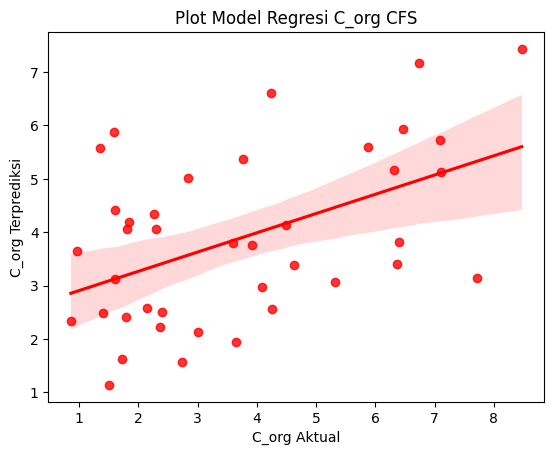

In [ ]:
sns.regplot(x = y_test, y = y_pred_test, color= 'red')
plt.title('Plot Model Regresi C_org CFS')
plt.xlabel("C_org Aktual")
plt.ylabel("C_org Terprediksi")
plt.show()

In [ ]:
#Comparison to all model on CFS Dataset
cfs_comp = pd.read_excel('/content/CFS.xlsx')
cfs_comp

,model,data,r2,smape
0,rfr,train,0.909752,0.265832
1,rfr,test,0.645070,0.474821
2,svr,train,0.409039,0.536551
3,svr,test,0.509880,0.569468
4,knn,train,0.410326,0.566249
5,knn,test,0.435562,0.481890
6,lr,train,0.373118,0.443023
7,lr,test,0.171859,0.448069


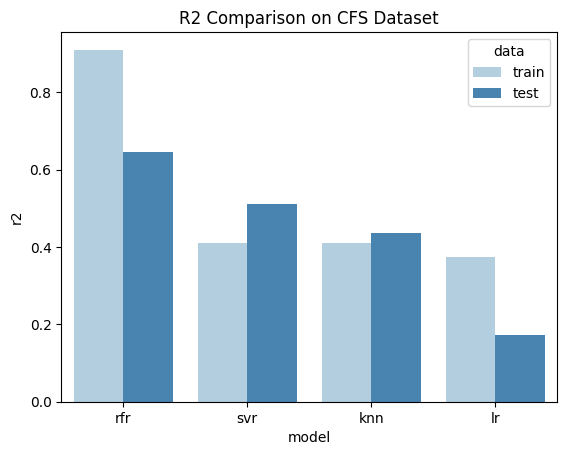

In [ ]:
sns.barplot(x = 'model',
            y = 'r2',
            hue = 'data',
            data = cfs_comp,
            palette = 'Blues')
plt.title("R2 Comparison on CFS Dataset") #Greater are better
plt.show()

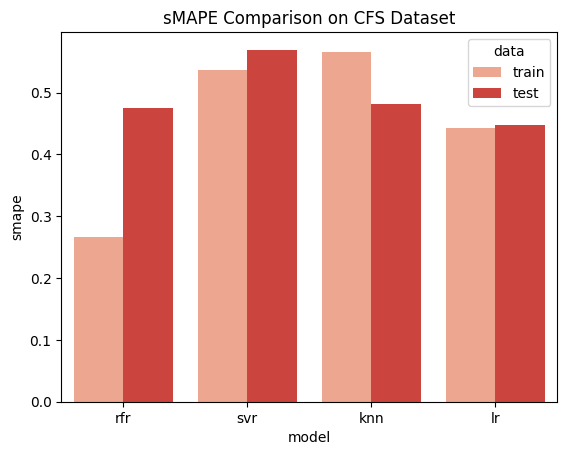

In [ ]:
sns.barplot(x = 'model',
            y = 'smape',
            hue = 'data',
            data = cfs_comp,
            palette = 'Reds')
plt.title("sMAPE Comparison on CFS Dataset") #Lower are better
plt.show()

## Mutual Information


In [ ]:
mut_info

,SBR,CH,CFaktor,Elevation,FOX,C_org
0,0.193955,3052.020020,0.071698,1402.089966,0.575013,8.95
2,0.242976,2774.060059,0.082701,1334.140015,0.574257,1.61
3,0.300105,2785.290039,0.247596,1352.099976,0.672975,2.83
4,0.146951,2834.620117,0.071133,1436.900024,0.618382,4.11
6,0.345694,2953.530029,0.075347,1254.520020,0.502905,5.35
...,...,...,...,...,...,...
141,0.249905,2827.209961,0.087343,1129.250000,0.632943,2.30
142,0.277429,2818.699951,0.060103,1166.459961,0.524975,4.49
143,0.228554,2824.169922,0.081159,1161.689941,0.461912,4.08
144,0.252376,2902.870117,0.070830,1157.489990,0.505564,3.53


In [ ]:
x = mut_info.iloc[:,0:5].values
y = mut_info.iloc[:,-1].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.30,
                                                    random_state = None)

In [ ]:
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = mlr.predict(x_train)

In [ ]:
y_pred_test = mlr.predict(x_test)

In [ ]:
print('Nilai R2 = ', r2_score(y_train,y_pred_train))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_train, p_real= y_train))

Nilai R2 =  0.3537775450144417
Nilai sMAPE =  0.4133675285299921


In [ ]:
print('Nilai R2 = ', r2_score(y_test,y_pred_test))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_test, p_real= y_test))

Nilai R2 =  0.24232089086125808
Nilai sMAPE =  0.4654411442159578


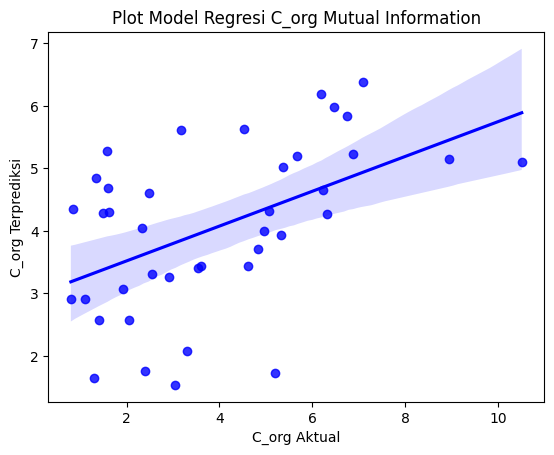

In [ ]:
sns.regplot(x = y_test, y = y_pred_test, color= 'blue')
plt.title('Plot Model Regresi C_org Mutual Information')
plt.xlabel("C_org Aktual")
plt.ylabel("C_org Terprediksi")
plt.show()

In [ ]:
#Comparison to all model on MI Datasets
mi_comp = pd.read_excel('/content/MI.xlsx')
mi_comp

,model,data,r2,smape
0,rfr,train,0.887466,0.186433
1,rfr,test,0.600274,0.330757
2,svr,train,0.476684,0.593175
3,svr,test,0.470250,0.458999
4,knn,train,0.475131,0.509993
5,knn,test,0.473455,0.485347
6,lr,train,0.353778,0.413368
7,lr,test,0.242321,0.465441


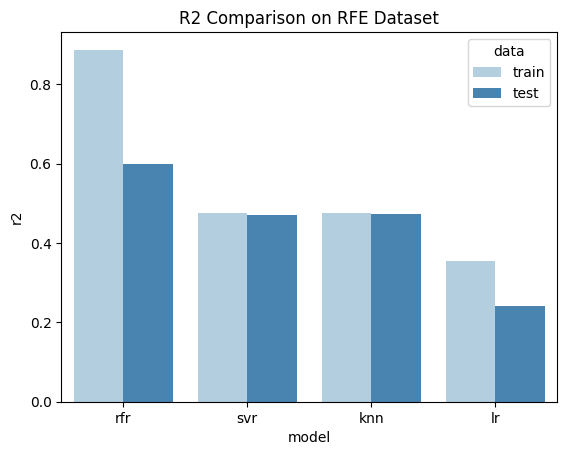

In [ ]:
sns.barplot(x = 'model',
            y = 'r2',
            hue = 'data',
            data = mi_comp,
            palette = 'Blues')
plt.title("R2 Comparison on RFE Dataset") #Greater are better
plt.show()

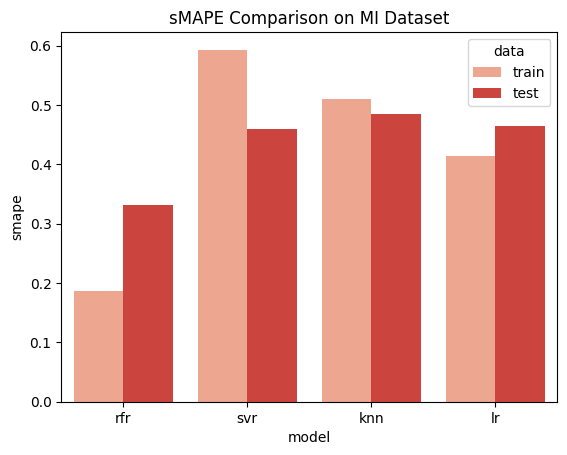

In [ ]:
sns.barplot(x = 'model',
            y = 'smape',
            hue = 'data',
            data = mi_comp,
            palette = 'Reds')
plt.title("sMAPE Comparison on MI Dataset") #Lower are better
plt.show()

## RFE

In [ ]:
rfe.head()

,NISI,CH,NDVI,Elevation,GOS,C_org
0,-0.449690,3052.020020,0.856604,1402.089966,5.95028,8.95
2,-0.443305,2774.060059,0.834598,1334.140015,4.46154,1.61
3,-0.010518,2785.290039,0.504808,1352.099976,2.14734,2.83
4,-0.497797,2834.620117,0.857734,1436.900024,6.22963,4.11
6,-0.490722,2953.530029,0.849305,1254.520020,5.39466,5.35


In [ ]:
x = rfe.iloc[:,0:5].values
y = rfe.iloc[:,-1].values

In [ ]:
mlr = LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.30,
                                                    random_state = None)

In [ ]:
mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = mlr.predict(x_train)

In [ ]:
y_pred_test = mlr.predict(x_test)

In [ ]:
print('Nilai R2 = ', r2_score(y_train,y_pred_train))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_train, p_real= y_train))

Nilai R2 =  0.4154392291536506
Nilai sMAPE =  0.38693552433310247


In [ ]:
print('Nilai R2 = ', r2_score(y_test,y_pred_test))
print('Nilai sMAPE = ', sMAPE(p_pred= y_pred_test, p_real= y_test))

Nilai R2 =  0.12610858739899056
Nilai sMAPE =  0.546611832437004


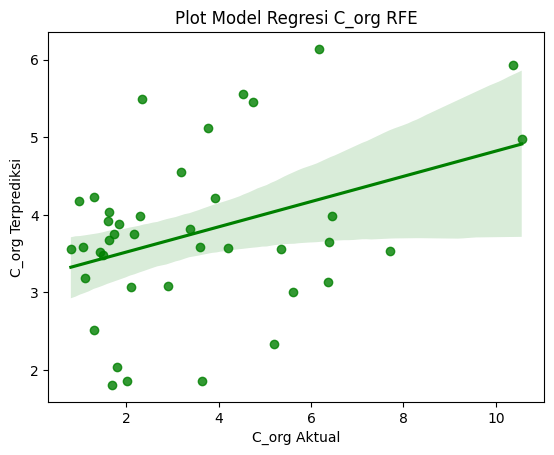

In [ ]:
sns.regplot(x = y_test, y = y_pred_test, color= 'green')
plt.title('Plot Model Regresi C_org RFE')
plt.xlabel("C_org Aktual")
plt.ylabel("C_org Terprediksi")
plt.show()

In [ ]:
#comparison to all model on RFE Datasets
rfe_comp = pd.read_excel('/content/RFE.xlsx')
rfe_comp

,model,data,r2,smape
0,rfr,train,0.891405,0.171020
1,rfr,test,0.611745,0.303516
2,svr,train,0.407538,0.535805
3,svr,test,0.511831,0.565731
4,knn,train,0.410326,0.566249
5,knn,test,0.435562,0.481890
6,lr,train,0.415439,0.386936
7,lr,test,0.126109,0.546612


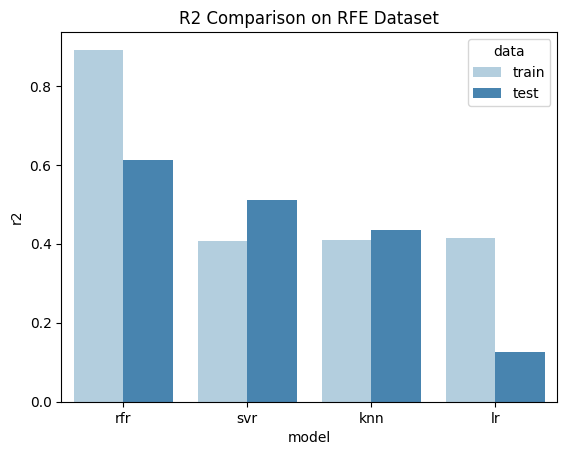

In [ ]:
sns.barplot(x = 'model',
            y = 'r2',
            hue = 'data',
            data = rfe_comp,
            palette = 'Blues')
plt.title("R2 Comparison on RFE Dataset") #Greater are better
plt.show()

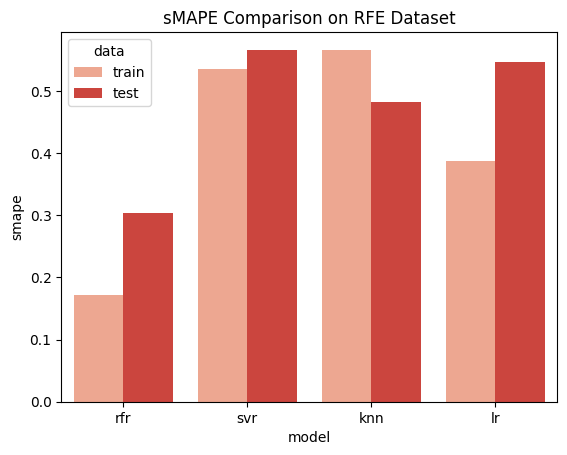

In [ ]:
sns.barplot(x = 'model',
            y = 'smape',
            hue = 'data',
            data = rfe_comp,
            palette = 'Reds')
plt.title("sMAPE Comparison on RFE Dataset") # Lower are better
plt.show()

## All model comparison in average

In [ ]:
avg_comp = pd.read_excel('/content/Average.xlsx')

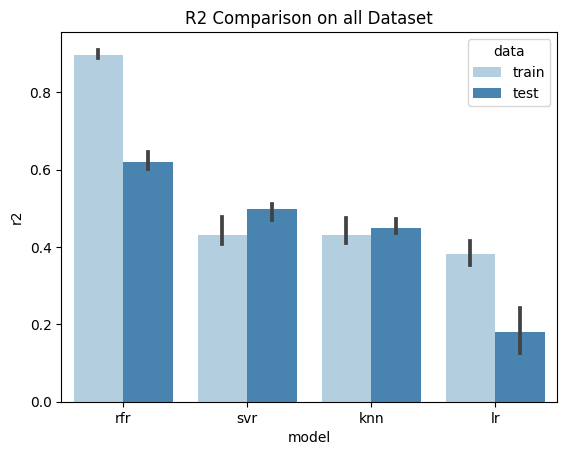

In [ ]:
sns.barplot(x = 'model',
            y = 'r2',
            hue = 'data',
            data = avg_comp,
            palette = 'Blues')
plt.title("R2 Comparison on all Dataset") #Greater are better
plt.show()

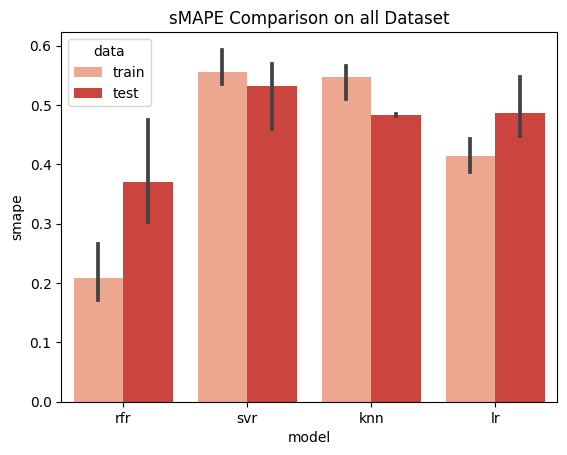

In [ ]:
sns.barplot(x = 'model',
            y = 'smape',
            hue = 'data',
            data = avg_comp,
            palette = 'Reds')
plt.title("sMAPE Comparison on all Dataset") # Lower are better
plt.show()

# Summary


## Data Cleaning




*   Raw Data has 146 Row X 29 Columns
*   No Missing and Duplicated Values
*   14 Outliers are detected through z score method
*   Shape of Data after cleaning are 132 x 29 Columns



## Feature Selection Results



*   On Correlation-Based Feature Selection (CFS), 5 Environment Covariate that
    has been selected from each of SCORPAN group are:
    *   Soil            : Normalized Impervious Surface Index (NISI)
    *   Climate         : Annual Precipitation (CH)
    *   Organism        : Cover Management Factor (CFaktor)
    *   Relief          : Elevation
    *   Parent Material : Gossan (GOS)
*   On Mutual Information (MI), 5 Environment Covariate that
    has been selected from each of SCORPAN group are:
    *   Soil            : Soil Brightness Ratio (SBR)
    *   Climate         : Annual Precipitation (CH)
    *   Organism        : Cover Management Factor (CFaktor)
    *   Relief          : Elevation
    *   Parent Material : Ferric Oxide (FOX)
*   On Recursive Feature Elimination (RFE), 5 Environment Covariate that
    has been selected from each of SCORPAN group are:
    *   Soil            : Normalized Impervious Surface Index (NISI)
    *   Climate         : Annual Precipitation (CH)
    *   Organism        : Normalized Difference Vegetation Index (NDVI)
    *   Relief          : Elevation
    *   Parent Material : Gossan (GOS)
*   All Feature Selection Results are grouped on three datasets (corr_mat,
    mut_info, rfe) and used as predictor for SOC Content Prediction.

## Models and Feature Selections Combinations



*   On Train Datasets, :
    * In term of R2 Score, **Random Forest Regressor (RFR) with CFS Datasets** has the highest R2 Score (90.98%), while **Support Vector Regressor (SVR) with RFE Dataset** has the lowest R2 Score (40.75%)
    * In term of sMAPE, **Random Forest Regressor (RFR) with RFE Datasets** has the highest sMAPE Scores (0.17), while **Support Vector Regressor(SVR) with RFE Dataset** has the lowest sMAPE Score (0.59)*
    * On average, **SVR** and **KNN-R** are slightly better in comparison to Multiple Linear Regression (MLR) while **RFR** are far more superior than other models. However, in term of sMAPE, **MLR** are better than SVR and KNN but inferior compared to **RFR**.
*   On Test Datasets, :
    * In term of R2 Score, **Random Forest Regressor (RFR) with CFS Datasets** has the highest R2 Score (64.51%), while **K - Nearest Neighbour Regressor (KNN-R) with CFS and RFE Dataset** has the lowest R2 Score (43.56%)
    * In term of sMAPE, **Random Forest Regressor (RFR) with RFE Datasets** has the highest sMAPE Scores (0.30), while **Support Vector Regressor(SVR) with CFS Dataset** has the lowest sMAPE Score (0.57)*
    * On average, **SVR** and **KNN-R** are better in comparison to Multiple Linear Regression (MLR) while **RFR** are more superior than other models. However, in term of sMAPE, **MLR** can be compared to **KNN** but slightly inferior compared to **SVR** and much more inferior than **RFR**.

Notes :
(*) = Lower is better


# Conclusion :
##Random Forest Regressor (RFR) with the combination of Recursive Feature Eliminations (RFE) are the best combination to use.
